In [1]:
import pandas as pd

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [2]:
df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207300.9
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,115983.8
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,14999.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119400.0
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180400.0
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265000.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500001.0


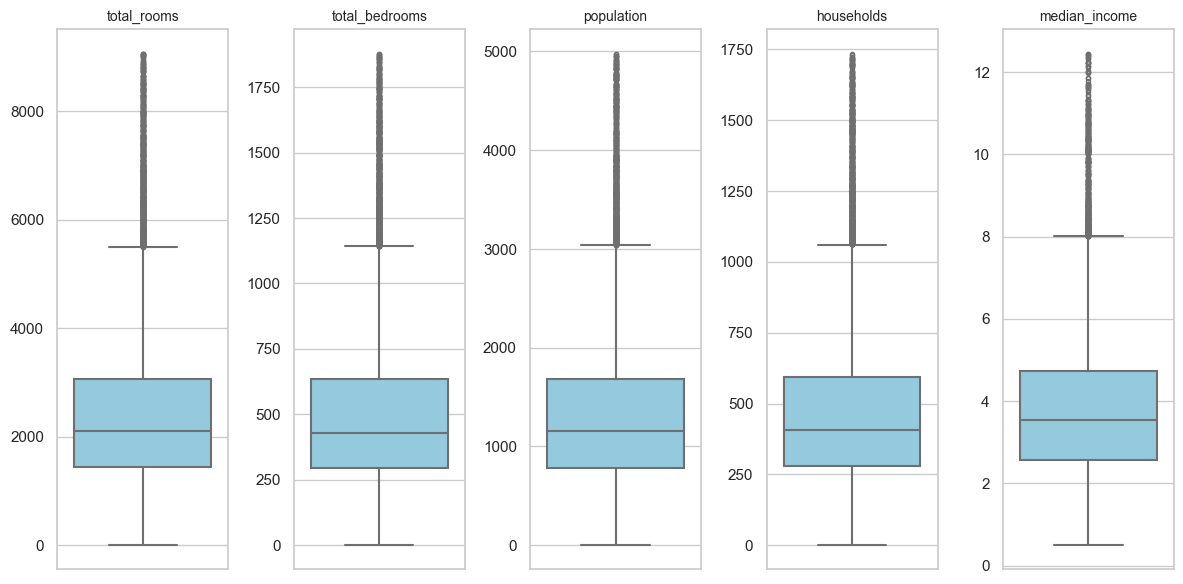

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(12, 6))

for i, col in enumerate(cols, 1):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 3.5 * IQR
    upper = Q3 + 3.5 * IQR
    
    trimmed = df[(df[col] >= lower) & (df[col] <= upper)]
    
    plt.subplot(1, len(cols), i)
    sns.boxplot(y=trimmed[col], color='skyblue', fliersize=3, linewidth=1.5)
    plt.title(col, fontsize=10)
    plt.xlabel("")
    plt.ylabel("")
    plt.tight_layout()

plt.show()



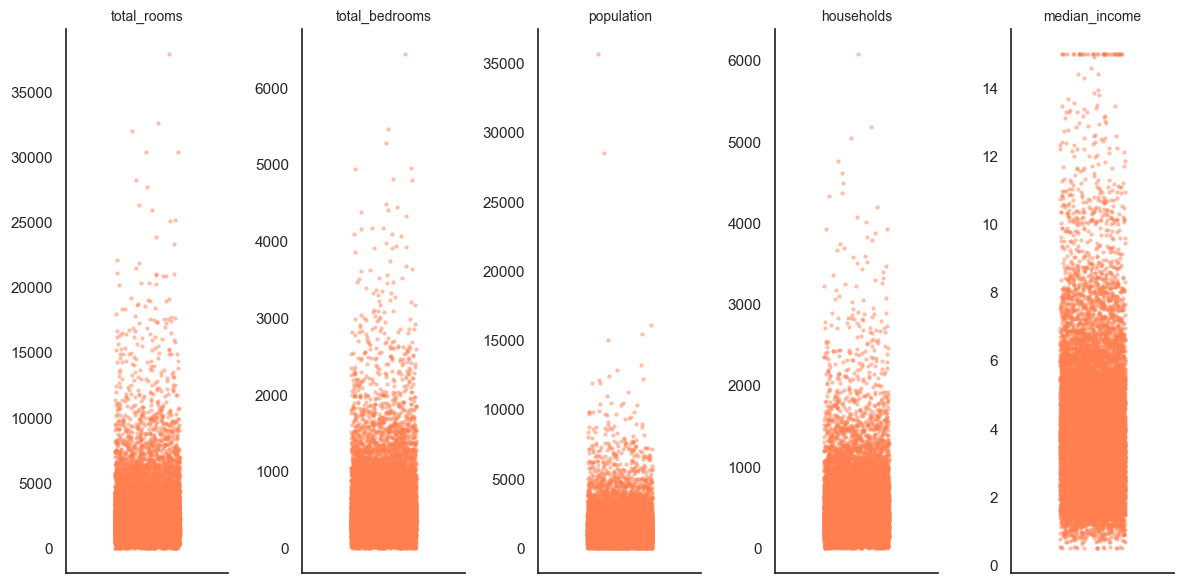

In [29]:
plt.figure(figsize=(12, 6))
sns.set_style("white")  # minimal grid

for i, col in enumerate(cols, 1):
    plt.subplot(1, len(cols), i)
    sns.stripplot(y=df[col], color='coral', alpha=0.5, size=3, jitter=0.2)
    sns.despine()  # remove top/right borders
    plt.title(col, fontsize=10)
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks([], [])  # remove x ticks for cleaner vertical
    plt.tight_layout()

plt.show()


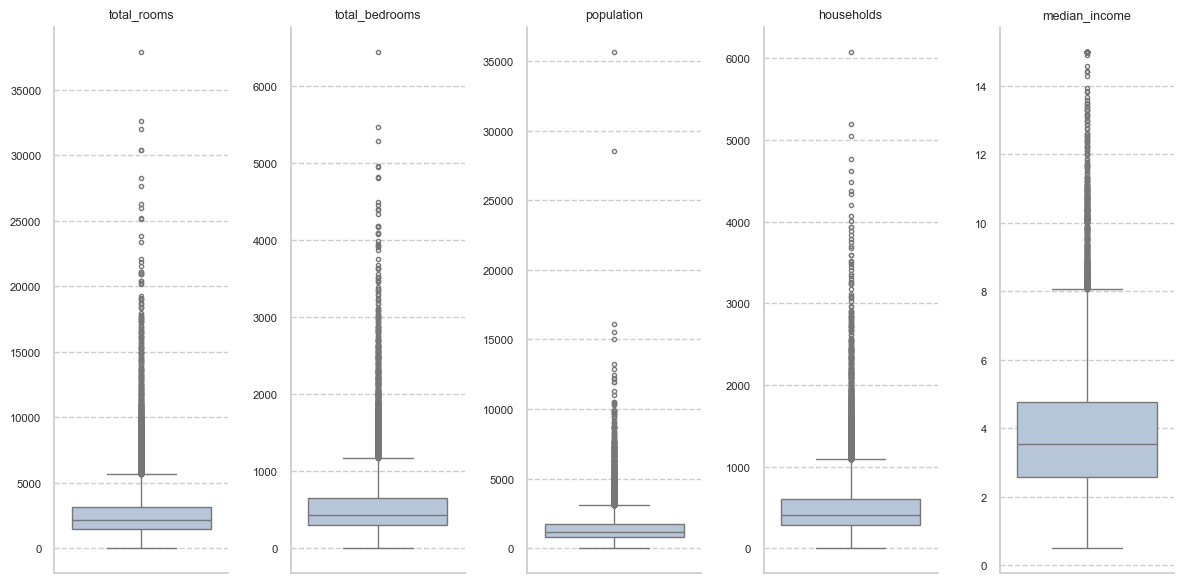

In [30]:
sns.set_style("whitegrid", {'axes.grid': True, 'grid.linestyle': '--', 'grid.linewidth': 0.3})
plt.figure(figsize=(12, 6))

for i, col in enumerate(cols, 1):
    plt.subplot(1, len(cols), i)
    sns.boxplot(y=df[col], color='lightsteelblue', fliersize=3, linewidth=1)
    sns.despine()
    plt.title(col, fontsize=9)
    plt.xticks([])
    plt.ylabel("")
    plt.tick_params(axis='y', labelsize=8)
    plt.tight_layout()

plt.show()

